# **With Dividend**

In [46]:
import yfinance as yf
import pandas as pd

In [47]:
ticker=yf.Ticker('SPY')

In [48]:
current_price=ticker.history(period='1d').Close.values[0]

In [49]:
current_date=pd.Timestamp.now()
maturity_date=current_date+pd.DateOffset(days=7)
maturity_date

Timestamp('2025-06-17 14:16:49.874902')

In [50]:
opt_chain = ticker.option_chain(maturity_date.strftime("%Y-%m-%d"))
calls = opt_chain.calls
puts = opt_chain.puts

In [51]:
end_date=pd.Timestamp.now()
start_date=end_date-pd.DateOffset(years=2)
df=yf.download('SPY',start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [52]:
spy=df['Close']
spy.head(2)

Ticker,SPY
Date,
2023-06-12,422.233765
2023-06-13,425.017487


In [53]:
vol = df['Close'].pct_change().std()
vol=vol[-1]

<ipython-input-53-2e26a25f0062>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vol=vol[-1]


In [54]:
import numpy as np
import math
annual_vol=vol*np.sqrt(252)
annual_vol

np.float64(0.16506664432433396)

In [55]:
!pip install fredapi

In [56]:
from fredapi import Fred
fred = Fred(api_key='0f20831928a8c94e2df17df8fdefe2e6')
latest_rate=((fred.get_series('TB3MS'))[-1])/100
latest_rate

<ipython-input-56-f8554fc235bc>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  latest_rate=((fred.get_series('TB3MS'))[-1])/100


np.float64(0.0425)

In [57]:
import yfinance as yf

# Download SPY data
spy = yf.Ticker("SPY")

# Get dividend history
dividends = spy.dividends

# Filter for quarterly dividends (last 4 quarters)
last_4_quarters = dividends.tail(4)

print(last_4_quarters)

Date
2024-06-21 00:00:00-04:00    1.759
2024-09-20 00:00:00-04:00    1.746
2024-12-20 00:00:00-05:00    1.966
2025-03-21 00:00:00-04:00    1.696
Name: Dividends, dtype: float64


In [58]:
dividend_rate = (float)(last_4_quarters.sum() / current_price)
dividend_rate

0.01192492618017278

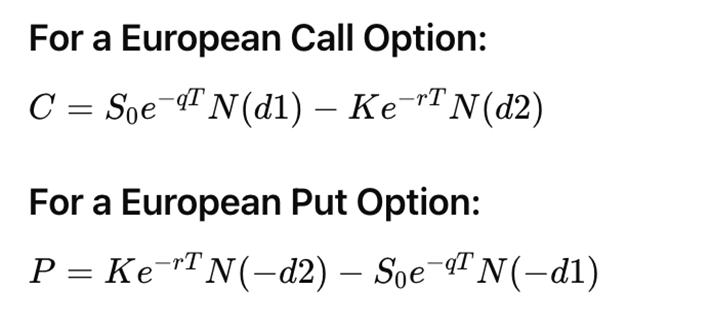

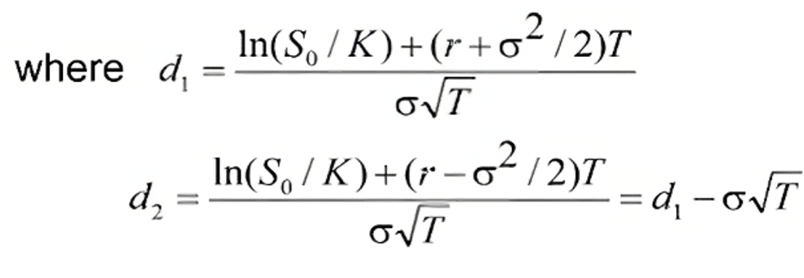

## **Call Option**

In [59]:
strike_price=int(current_price)+1
option_det=calls[calls['strike']==strike_price]
option_det

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
46,SPY250617C00602000,2025-06-10 13:43:39+00:00,602.0,3.94,3.91,3.95,0.23,6.199461,15.0,421,0.124459,False,REGULAR,USD


In [60]:
#Required Data
S = current_price
K = strike_price
r = latest_rate
q = dividend_rate
sigma = annual_vol
print(sigma)
T=(float)(6/252)

0.16506664432433396


In [61]:
d1=(np.log(S/K) + (r+(sigma**2)/2)*T) / (sigma*np.sqrt(T))
d1

np.float64(-0.012154608064558706)

In [62]:
d2=d1-(sigma*np.sqrt(T))
d2

np.float64(-0.037624944250804565)

In [63]:
from scipy.stats import norm

In [64]:
model_price = S*norm.cdf(d1)*np.exp(-q*T)  - K*(np.exp(-r*T))*norm.cdf(d2)
model_price

np.float64(5.835594699280307)

## **Conclusion**

So Modeled Option's Price = $6.19

Whereas the actual price = $4.61

As (Actual < Modeled) an asset is underprices(good for the buyer)

And The value of price is same unlike the binomial model where the modeled price got more and more finer as N increased.

In [65]:
strike_price=int(current_price)+1
option_det=puts[puts['strike']==strike_price]
option_det

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
76,SPY250617P00602000,2025-06-10 13:43:49+00:00,602.0,5.07,5.03,5.06,-0.6,-10.582009,18.0,166,0.128183,True,REGULAR,USD


In [66]:
#Required Data
S = current_price
K = strike_price
r = latest_rate
q = dividend_rate
sigma = annual_vol
print(sigma)
T=(float)(6/252)

0.16506664432433396


In [67]:
d1=(np.log(S/K) + (r+(sigma**2)/2)*T) / (sigma*np.sqrt(T))
d1

np.float64(-0.012154608064558706)

In [68]:
d2=d1-(sigma*np.sqrt(T))
d2

np.float64(-0.037624944250804565)

In [69]:
model_price = K*(np.exp(-r*T))*norm.cdf(-d2) - S*np.exp(-q*T)*norm.cdf(-d1)
model_price

np.float64(6.387345006774808)

## ***Conclusion***

So Modeled Option's Price = $6.01

Whereas the actual price = $4.71

As (Actual < Modeled) an asset is underprices(good for the buyer)

And The value of price is same unlike the binomial model where the modeled price got more and more finer as N increased.